## Capstone Project - Opening a Restaurant near by IT Parks in Chennai, India
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Business Problem](#business)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

For many employees, visiting restaurants is a great way to relax and enjoy themselves during weekdays (work hours), weekends and holidays. People will choose the nearest the restaurants because they must continue their deliverables and to reduce the travelling time and cost. Many of IT employees often visit restaurants if you provide the good quality of food and different taste than others. 

For better business choosing the best location and type of style like North Indian, Chinese and South Indian is major part. Our business will get succeeded if you we choose these parameters correctly.
So, we will try to find the optimal location with our data and technology.

## Business Problem <a name="business"></a> 

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in **opening a restaurant near by IT Parks in Chennai, India**.

Since there are lots of restaurants in Chennai, we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no North Indian and/or Chinese restaurants in vicinity. We would also prefer locations as close to city centre as possible, if first two conditions are met. We will use our data science powers to generate a few most promising neighbourhoods based on this criterion. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

Using data science methodology and machine learning techniques like clustering, this project aims to provide solutions to answer the business question:
**If a Investor is looking to open a new restaurant, where would you recommend that they open it?**

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:

* List of neighbourhoods i.e. IT Parks in Chennai
* List of existing restaurants in the neighbourhood (any type of restaurant)
* List of and distance to North Indian and/or Chinese restaurants in the neighbourhood, if any
* Latitude and longitude coordinates of those neighbourhoods. This is required in order to plot the map and to get the venue data.
* Venue data, particularly data related to restaurants.
* We will use this data to perform clustering on the neighbourhoods.

Importing the required packages to this project

In [1]:
import pandas as pd
import numpy as np
import requests
# Tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
import folium
# Import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
%matplotlib inline

#### Use geopy library to get the latitude and longitude values of Chennai City.

In [2]:
address = 'Chennai, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Chennai are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Chennai are 13.0801721, 80.2838331.


#### Getting the neighborhood data from Wikipedia bu using the Pandas package.

In [3]:
wiki_df=pd.read_html('https://en.wikipedia.org/wiki/List_of_tech_parks_in_Chennai')

In [4]:
df_it=wiki_df[1]

In [5]:
df_it.isnull().sum()

Company name                  1
Lakh sqft                    11
Address                       5
Investment                   97
Start datecurrent status      7
Notable clients              68
Unnamed: 6                  110
dtype: int64

In [6]:
df_it[df_it['Company name'].isnull()]

,Company name,Lakh sqft,Address,Investment,Start datecurrent status,Notable clients,Unnamed: 6
29,NaN,RMZ Millenia - Phase II,17,Taramani,NaN,2008,"Flex, Ford, Shell"


In [7]:
df_it.loc[29,'Address']='Taramani'
df_it.loc[29,'Lakh sqft']=17
df_it.loc[29,'Company name']='RMZ Millenia - Phase II'
df_it.loc[29,'Start datecurrent status']=2008
df_it.loc[29,'Notable clients']='Flex, Ford, Shell'

In [8]:
df_it.isnull().sum()

Company name                  0
Lakh sqft                    11
Address                       5
Investment                   97
Start datecurrent status      6
Notable clients              68
Unnamed: 6                  110
dtype: int64

In [9]:
df_it[df_it['Address'].isnull()]

,Company name,Lakh sqft,Address,Investment,Start datecurrent status,Notable clients,Unnamed: 6
4,"Mahindra World City, New Chennai",NaN,NaN,NaN,2002,"Infosys [1], BMW, Braun, TTK Group, Capgemini,...",NaN
34,Aroha e-serve,0,NaN,NaN,Planning,NaN,NaN
36,Prestige Polygon IT park,NaN,NaN,1500,Completed,"Durr, RR Donneley",NaN
52,Rattha co - TEK heights,NaN,NaN,NaN,UC,NaN,NaN
91,Rattha Tek Towers,NaN,NaN,250,Completed,NaN,NaN


In [10]:
df_it.loc[4,'Address']='Sengundram, Chennai'
df_it.loc[34,'Address']='MANDAVELI, Chennai'
df_it.loc[36,'Address']='Teynampet, Chennai'
df_it.loc[52,'Address']='Sholinganallur, Chennai'
df_it.loc[91,'Address']='Thoraipakkam, Chennai'

In [11]:
df_it.isnull().sum()

Company name                  0
Lakh sqft                    11
Address                       0
Investment                   97
Start datecurrent status      6
Notable clients              68
Unnamed: 6                  110
dtype: int64

In [12]:
df_it.rename(columns={'Company name':'Chennai_IT_Parks', 'Address':'Neighborhood'}, inplace=True)

In [13]:
it_park_df=df_it[['Chennai_IT_Parks','Neighborhood']]

In [14]:
it_park_df[it_park_df['Chennai_IT_Parks']=='Indus cityscape - Techscape towers']

,Chennai_IT_Parks,Neighborhood
90,Indus cityscape - Techscape towers,OMR


In [15]:
it_park_df.loc[69,'Neighborhood']='Ekkaduthangal, Chennai'

C:\Users\knataru\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\knataru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
it_park_df.loc[89,'Neighborhood']='Indira Nagar, Adyar, Chennai'
it_park_df.loc[90,'Neighborhood']='Poonamallee High Road, Chetpet, Chennai'

C:\Users\knataru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\knataru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dc=it_park_df.groupby(['Neighborhood'])
results=dc.first()
results.to_csv('print_result.csv')

In [17]:
raw_data_df=pd.read_csv('print_result.csv')

In [18]:
raw_data_df.head()

,Neighborhood,Chennai_IT_Parks
0,Chetpet,Keyaram Hotels
1,Mount Road,Navin's WSS Towers
2,Mylapore,Shanthi Builders
3,Okkiyam,Puravankara Primus
4,Mylapore,A.R Foundations - Acropolis


In [19]:
final_df=raw_data_df.groupby(['Neighborhood']).first().reset_index()

In [20]:
len(final_df)

46

In [21]:
final_df.head()

,Neighborhood,Chennai_IT_Parks
0,Alwarpet,Lancor Gesco
1,Ambattur,Best & Crompton
2,Ambattur Industrial Estate,Prince Info Park (IT)
3,Ayyapanthangal,ESTRA SEZ
4,CIT Nagar,ASV Ramana Tech Park


Getting the Coordinates for our neighborhoods available in the dataframe

In [29]:
lat_list=[]
long_list=[]
for i,neigh in enumerate(final_df['Neighborhood']):
    address = neigh + ', Chennai, India'
    print(i, address)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    lat_list.append(location.latitude)
    long_list.append(location.longitude)

0 Alwarpet, Chennai, India
1 Ambattur, Chennai, India
2 Ambattur Industrial Estate, Chennai, India
3 Ayyapanthangal, Chennai, India
4 CIT Nagar, Chennai, India
5 Chetpet, Chennai, India
6 Chromepet, Chennai, India
7 Egmore, Chennai, India
8 Ekkattuthangal, Chennai, India
9 Guduvancherry, Chennai, India
10 Guindy, Chennai, India
11 Guindy industrial estate, Chennai, India
12 Indira Nagar, Adyar, Chennai, India
13 Kandanchavadi, Chennai, India
14 Karapakkam, Chennai, India
15 Kelambakkam, Chennai, India
16 Kottivakkam, Chennai, India
17 Koyambedu, Chennai, India
18 MANDAVELI, Chennai, India
19 MRC Nagar, Chennai, India
20 Mahindra city, Chennai, India
21 Mettukuppam, Chennai, India
22 Mount Road, Chennai, India
23 Mylapore, Chennai, India
24 Nandambakkam, Chennai, India
25 Navalur, Chennai, India
26 Nelson Manickam Road, Chennai, India
27 Okkiyam, Chennai, India
28 Pallavaram, Chennai, India
29 Pallikaranai, Chennai, India
30 Perungalathur, Chennai, India
31 Perungudi, Chennai, India
32 

In [30]:
final_df['latitude']=lat_list
final_df['longitude']=long_list

In [31]:
final_df.head()

,Neighborhood,Chennai_IT_Parks,latitude,longitude
0,Alwarpet,Lancor Gesco,13.033860,80.254549
1,Ambattur,Best & Crompton,13.119375,80.150765
2,Ambattur Industrial Estate,Prince Info Park (IT),13.092285,80.167549
3,Ayyapanthangal,ESTRA SEZ,13.037793,80.134942
4,CIT Nagar,ASV Ramana Tech Park,13.029384,80.234283


In [32]:
# create map of Totonto using latitude and longitude values
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(final_df['latitude'], final_df['longitude'], final_df['Chennai_IT_Parks'], final_df['Neighborhood']):
    label = '{}, {}'.format(borough, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

In [37]:
CLIENT_ID = 'UV01NLZYDUVQZO5RVRUINM05KRFE1RFDWXZYJH2HDW2UV0UX'
CLIENT_SECRET = 'Y1ZBSW0WVNS2YLCZUR3JRTNVVLZ2DFURNDK2OY5KOVZTRZ1G'
#version = '20180604'

In [34]:
parks_list=list(final_df['Chennai_IT_Parks'])
nei_list=list(final_df['Neighborhood'])

In [38]:
# Category IDs corresponding to Italian restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):
#I have included Indian, Andhra, Hyderabadi, South Indian, North Indian, Indian chinese
food_category = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues

indian_restaurant_categories = ['4bf58dd8d48988d10f941735','54135bf5e4b08f3d2429dfe5','54135bf5e4b08f3d2429dfe6',
                                 '54135bf5e4b08f3d2429dfdf','54135bf5e4b08f3d2429dfde','54135bf5e4b08f3d2429dfdd']
def is_restaurant(categories, specific_filter=None):
    restaurant_words = ['restaurant', 'diner', 'taverna', 'steakhouse']
    restaurant = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in restaurant_words:
            if r in category_name:
                restaurant = True
        if 'fast food' in category_name:
            restaurant = False
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            restaurant = True
    return restaurant, specific

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Chennai', '')
    address = address.replace(', India', '')
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

def get_restaurants(lats, lons):
    restaurants = {}
    indian_restaurants = {}
    location_restaurants = []
    venues_list=[]

    print('Obtaining venues around candidate locations:', end='')
    for lat, lon in zip(lats, lons):
        # Using radius=350 to meke sure we have overlaps/full coverage so we don't miss any restaurant (we're using dictionaries to remove any duplicates resulting from area overlaps)
        venues = get_venues_near_location(lat, lon, food_category, CLIENT_ID, CLIENT_SECRET, radius=350, limit=100)
        area_restaurants = []
        for venue in venues:
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
            is_res, is_indian = is_restaurant(venue_categories, specific_filter=indian_restaurant_categories)
            if is_res:
                #x, y = lonlat_to_xy(venue_latlon[1], venue_latlon[0])
                restaurant = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, venue_distance, is_indian)
                if venue_distance<=300:
                    area_restaurants.append(restaurant)
                restaurants[venue_id] = restaurant
                if is_indian:
                    indian_restaurants[venue_id] = restaurant
        location_restaurants.append(area_restaurants)
        print(' .', end='')        
    print(' done.')
    return restaurants, indian_restaurants, location_restaurants

In [39]:
restaurants, indian_restaurants, location_restaurants = get_restaurants(lat_list, long_list)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [40]:
print('Total number of restaurants:', len(restaurants))
print('Total number of location_restaurants:', len(location_restaurants))
print('Total number of Indian restaurants:', len(indian_restaurants))
print('Percentage of Indian restaurants: {:.2f}%'.format(len(indian_restaurants) / len(restaurants) * 100))
print('Average number of restaurants in neighborhood:', np.array([len(r) for r in location_restaurants]).mean())

Total number of restaurants: 125
Total number of location_restaurants: 46
Total number of Indian restaurants: 62
Percentage of Indian restaurants: 49.60%
Average number of restaurants in neighborhood: 2.1739130434782608


In [41]:
def getNearbyVenues(nei, parks, lats, lons):
    
    venues_list=[]
    for nei, parks, lat, lon in zip(nei, parks, lats, lons):
        #print(name)
        venues = get_venues_near_location(lat, lon, food_category, client_id, client_secret, radius=350, limit=100)
        # create the API request URL
        #url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        #client_id, client_secret, version, lat, lng, radius, limit)
        for venue in venues:
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2][0][0]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
        
        # make the GET request
        #results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                nei,
                parks,
                lat, 
                lng, 
                venue_name, 
                venue_latlon[0], 
                venue_latlon[1],
                venue_address,
                venue_categories)])
        #print(venues_list)
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Chennai IT Parks',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Address',
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
# type your answer here
client_id = 'UV01NLZYDUVQZO5RVRUINM05KRFE1RFDWXZYJH2HDW2UV0UX' # your Foursquare ID
client_secret = 'Y1ZBSW0WVNS2YLCZUR3JRTNVVLZ2DFURNDK2OY5KOVZTRZ1G' # your Foursquare Secret
version = '20180724' # Foursquare API version
Chennai_venues = getNearbyVenues(nei=final_df['Neighborhood'],
                                   parks=final_df['Chennai_IT_Parks'],
                                   lats=final_df['latitude'],
                                   lons=final_df['longitude']
                                  )

In [43]:
Chennai_venues.shape

(176, 9)

In [44]:
Chennai_venues.head()

,Neighborhood,Chennai IT Parks,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Address,Venue Category
0,Chromepet,SRM Tech Park,12.949684,80.24666,Namma Veedu Vasantha Bhavan,12.948606,80.137978,India,Vegetarian / Vegan Restaurant
1,Chromepet,SRM Tech Park,12.949684,80.24666,Hotel Grand Palace Chennai,12.947871,80.137813,"257, GST Road, Near MIT Gate, Chromepet 600044...",Indian Restaurant
2,Egmore,RCTECH,13.072832,80.24666,Flower Drum,13.071439,80.259281,"Prince Plaza, Pantheon Road",Thai Restaurant
3,Egmore,RCTECH,13.072832,80.24666,Mathsya,13.075042,80.257878,"1 Halls Rd. 600 008, Tamil Nadu",Indian Restaurant
4,Egmore,RCTECH,13.072832,80.24666,Café Coffee Day,13.075382,80.259118,"Near Egmore Station, Tamil Nadu",Café


# Analysis <a name="analysis"></a>

Let's see the total number of venues available for each neighborhood

In [45]:
Chennai_venues.groupby('Neighborhood').count()

,Chennai IT Parks,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Address,Venue Category
Neighborhood,,,,,,,,
Chromepet,2,2,2,2,2,2,2,2
Egmore,4,4,4,4,4,4,4,4
Ekkattuthangal,4,4,4,4,4,4,4,4
Guduvancherry,3,3,3,3,3,3,3,3
Guindy,7,7,7,7,7,7,7,7
Guindy industrial estate,2,2,2,2,2,2,2,2
"Indira Nagar, Adyar",2,2,2,2,2,2,2,2
Kandanchavadi,2,2,2,2,2,2,2,2
Karapakkam,4,4,4,4,4,4,4,4


In [46]:
len(Chennai_venues.groupby('Neighborhood').count())

36

In [47]:
print('There are {} uniques categories.'.format(len(Chennai_venues['Venue Category'].unique())))

There are 33 uniques categories.


In [48]:
Chennai_venues['Venue Category'].unique()

array(['Vegetarian / Vegan Restaurant', 'Indian Restaurant',
       'Thai Restaurant', 'Café', 'Fast Food Restaurant',
       'Middle Eastern Restaurant', 'Asian Restaurant',
       'Southern / Soul Food Restaurant', 'South Indian Restaurant',
       'Italian Restaurant', 'Molecular Gastronomy Restaurant', 'Bakery',
       'Breakfast Spot', 'Burger Joint', 'Chinese Restaurant',
       'Afghan Restaurant', 'Snack Place', 'Pizza Place',
       'Sandwich Place', 'Gastropub', 'Modern European Restaurant',
       'Restaurant', 'Food Court', 'Indian Chinese Restaurant',
       'Cafeteria', 'Multicuisine Indian Restaurant',
       'American Restaurant', 'Chettinad Restaurant',
       'Rajasthani Restaurant', 'Kebab Restaurant', 'BBQ Joint',
       'Kerala Restaurant', 'Food'], dtype=object)

Converting the text to numeric by using one hot coding technique

In [49]:
# one hot encoding
manhattan_onehot = pd.get_dummies(Chennai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = Chennai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Cafeteria,Café,...,Multicuisine Indian Restaurant,Pizza Place,Rajasthani Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Chromepet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Chromepet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Egmore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Egmore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Egmore,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
manhattan_onehot.shape

(176, 34)

In [51]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Cafeteria,Café,...,Multicuisine Indian Restaurant,Pizza Place,Rajasthani Restaurant,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant
0,Chromepet,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.500000
1,Egmore,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.250000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.25,0.000000
2,Ekkattuthangal,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.00,0.000000
3,Guduvancherry,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.00,0.00,0.000000
4,Guindy,0.000000,0.000000,0.142857,0.000000,0.142857,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.142857
5,Guindy industrial estate,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
6,"Indira Nagar, Adyar",0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.5,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
7,Kandanchavadi,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.500000
8,Karapakkam,0.000000,0.000000,0.000000,0.000000,0.250000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
9,Kelambakkam,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000


In [52]:
manhattan_grouped.shape

(36, 34)

In [53]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chromepet----
                           venue  freq
0              Indian Restaurant   0.5
1  Vegetarian / Vegan Restaurant   0.5
2               Asian Restaurant   0.0
3               Kebab Restaurant   0.0
4                Thai Restaurant   0.0


----Egmore----
                             venue  freq
0                Indian Restaurant  0.50
1                  Thai Restaurant  0.25
2                             Café  0.25
3  Southern / Soul Food Restaurant  0.00
4          South Indian Restaurant  0.00


----Ekkattuthangal----
                             venue  freq
0                 Asian Restaurant  0.25
1        Middle Eastern Restaurant  0.25
2  Southern / Soul Food Restaurant  0.25
3             Fast Food Restaurant  0.25
4                Afghan Restaurant  0.00


----Guduvancherry----
                     venue  freq
0        Indian Restaurant  0.33
1  South Indian Restaurant  0.33
2     Fast Food Restaurant  0.33
3              Pizza Place  0.00
4        Kerala Restauran

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chromepet,Vegetarian / Vegan Restaurant,Indian Restaurant,Southern / Soul Food Restaurant,Gastropub,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint
1,Egmore,Indian Restaurant,Café,Thai Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Indian Chinese Restaurant,American Restaurant
2,Ekkattuthangal,Southern / Soul Food Restaurant,Asian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Café,Food,Chinese Restaurant,Chettinad Restaurant,Burger Joint
3,Guduvancherry,Indian Restaurant,South Indian Restaurant,Fast Food Restaurant,Cafeteria,Food Court,Food,Chinese Restaurant,Chettinad Restaurant,Café,Burger Joint
4,Guindy,Indian Restaurant,Molecular Gastronomy Restaurant,Asian Restaurant,Bakery,Italian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Food,American Restaurant,Southern / Soul Food Restaurant


# Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Chennai IT parks that have low restaurant density, particularly those with low number of Special restaurants.

In first step we have collected the required **data: location and type (category) of every restaurant**.
Second step in our analysis will be calculation and exploration of '**restaurant density**' across different areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders.

##  Cluster Neighborhoods

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the number of restaurants in every area candidate:

In [56]:
location_restaurants_count = [len(res) for res in location_restaurants]
final_df['Restaurants in area'] = location_restaurants_count
print('Average number of restaurants in every area with radius=300m:', np.array(location_restaurants_count).mean())
final_df.head()

Average number of restaurants in every area with radius=300m: 2.1739130434782608


,Neighborhood,Chennai_IT_Parks,latitude,longitude,Restaurants in area
0,Alwarpet,Lancor Gesco,13.033860,80.254549,6
1,Ambattur,Best & Crompton,13.119375,80.150765,1
2,Ambattur Industrial Estate,Prince Info Park (IT),13.092285,80.167549,0
3,Ayyapanthangal,ESTRA SEZ,13.037793,80.134942,1
4,CIT Nagar,ASV Ramana Tech Park,13.029384,80.234283,3


Looking good. What we have now is a clear indication of zones with low number of restaurants in vicinity, and no Italian restaurants at all nearby.

Let us now cluster those locations to create centers of zones containing good locations. Those zones, their centers and addresses will be the final result of our analysis.

In [57]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 2, 2, 2, 3, 1, 0, 2])

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = final_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [59]:
manhattan_merged.shape # check the last columns!

(46, 16)

In [60]:
manhattan_merged.head()

,Neighborhood,Chennai_IT_Parks,latitude,longitude,Restaurants in area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alwarpet,Lancor Gesco,13.033860,80.254549,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ambattur,Best & Crompton,13.119375,80.150765,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ambattur Industrial Estate,Prince Info Park (IT),13.092285,80.167549,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ayyapanthangal,ESTRA SEZ,13.037793,80.134942,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CIT Nagar,ASV Ramana Tech Park,13.029384,80.234283,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
manhattan_merged['Cluster Labels'].fillna(0,inplace=True)

Finally, let's visualize the resulting clusters

[0 0 2 2 2 2 3 1 0 2 4 0 0 2 2 2 0 0 2 2 2 0 0 2 2 0 0 2 0 2 1 0 0 0 2 1]


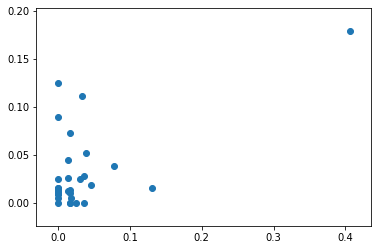

In [80]:
print(kmeans.labels_)
#print(kmeans.cluster_centers_[0])
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[2])
plt.show()

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['latitude'], manhattan_merged['longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [63]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Chennai_IT_Parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lancor Gesco,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Best & Crompton,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Prince Info Park (IT),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ESTRA SEZ,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASV Ramana Tech Park,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Keyaram Hotels,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SRM Tech Park,0.0,Vegetarian / Vegan Restaurant,Indian Restaurant,Southern / Soul Food Restaurant,Gastropub,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint
7,RCTECH,0.0,Indian Restaurant,Café,Thai Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Indian Chinese Restaurant,American Restaurant
14,Marg Digital Zone II,0.0,Indian Restaurant,Bakery,Indian Chinese Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Breakfast Spot,Burger Joint,Cafeteria,Café
17,Reliance Tech Park,0.0,Indian Restaurant,Chinese Restaurant,Burger Joint,Afghan Restaurant,Snack Place,Food Court,American Restaurant,Asian Restaurant,BBQ Joint,Bakery


In [64]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Chennai_IT_Parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Prince Infocity,1.0,Vegetarian / Vegan Restaurant,Chinese Restaurant,Indian Chinese Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Cafeteria
40,Tidel Park,1.0,Vegetarian / Vegan Restaurant,Indian Chinese Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Cafeteria,Café
45,Shapoorji Pallonji Infocity(SP Infocity),1.0,Vegetarian / Vegan Restaurant,Chinese Restaurant,Indian Chinese Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint,Cafeteria


In [65]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Chennai_IT_Parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Ramaniyam - Kamak towers,2.0,Southern / Soul Food Restaurant,Asian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Café,Food,Chinese Restaurant,Chettinad Restaurant,Burger Joint
9,L&T Estancia IT SEZ,2.0,Indian Restaurant,South Indian Restaurant,Fast Food Restaurant,Cafeteria,Food Court,Food,Chinese Restaurant,Chettinad Restaurant,Café,Burger Joint
10,Olympia Tech Park,2.0,Indian Restaurant,Molecular Gastronomy Restaurant,Asian Restaurant,Bakery,Italian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Food,American Restaurant,Southern / Soul Food Restaurant
11,Pioneer Asia - Tamarai Tech Park,2.0,Fast Food Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Café,Food Court,Food,Chinese Restaurant,Chettinad Restaurant,Cafeteria,Indian Chinese Restaurant
15,Krishnan Sivagami Trust,2.0,Indian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Bakery,Café,Food Court,Food,Chinese Restaurant,Chettinad Restaurant,Cafeteria
19,ROVERCO (rattha)- Times square,2.0,Indian Restaurant,Sandwich Place,Bakery,Gastropub,Modern European Restaurant,Café,Food,Fast Food Restaurant,Chinese Restaurant,Chettinad Restaurant
20,Ascendas Mahindra city IT park,2.0,Indian Restaurant,Fast Food Restaurant,Restaurant,Chinese Restaurant,Pizza Place,Bakery,BBQ Joint,Breakfast Spot,Gastropub,Burger Joint
21,ASV suntech Park,2.0,Indian Restaurant,Indian Chinese Restaurant,Fast Food Restaurant,Food Court,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Breakfast Spot,Burger Joint
24,Vishranthi homes Jayanth Techpark,2.0,South Indian Restaurant,Multicuisine Indian Restaurant,American Restaurant,Bakery,Pizza Place,Cafeteria,Food,Fast Food Restaurant,Chinese Restaurant,Chettinad Restaurant
25,ETA Ascon - (ETA Tech Park-SEZ),2.0,Vegetarian / Vegan Restaurant,South Indian Restaurant,Asian Restaurant,Indian Restaurant,Snack Place,Food Court,American Restaurant,Southern / Soul Food Restaurant,BBQ Joint,Bakery


In [66]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Chennai_IT_Parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Robin estates Bridgetown IT park,3.0,Breakfast Spot,Burger Joint,Vegetarian / Vegan Restaurant,Indian Chinese Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Cafeteria,Café


In [67]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Chennai_IT_Parks,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Rayala corporation - Rayala Technopark,4.0,Bakery,Vegetarian / Vegan Restaurant,Indian Chinese Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Breakfast Spot,Burger Joint,Cafeteria,Café


# Results and Discussion <a name="results"></a>

Our analysis shows that although there are number of restaurants in Chennai, the neighbourhood Indira Nagar, Adyar does not have traditional and special taste of restaurants near by Robin estates Bridgetown IT park. So we can consider this to start.

Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

# Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Berlin areas close to center with low number of restaurants (particularly authentic taste restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new restaurant. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.